## Exercici 
Descarrega el data set [Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/giovamata/airlinedelaycauses) i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import sys
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
rows = None
pd.options.display.max_columns = None
datasets_path = "D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets\""
file = (datasets_path + "DelayedFlights.csv").replace(r"\\", r"\\\\")
df = pd.read_csv(file, sep=',', encoding='utf8', index_col=0, nrows=rows)
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Documentació de la descripció de les columnes a [Get the data](http://stat-computing.org/dataexpo/2009/the-data.html)
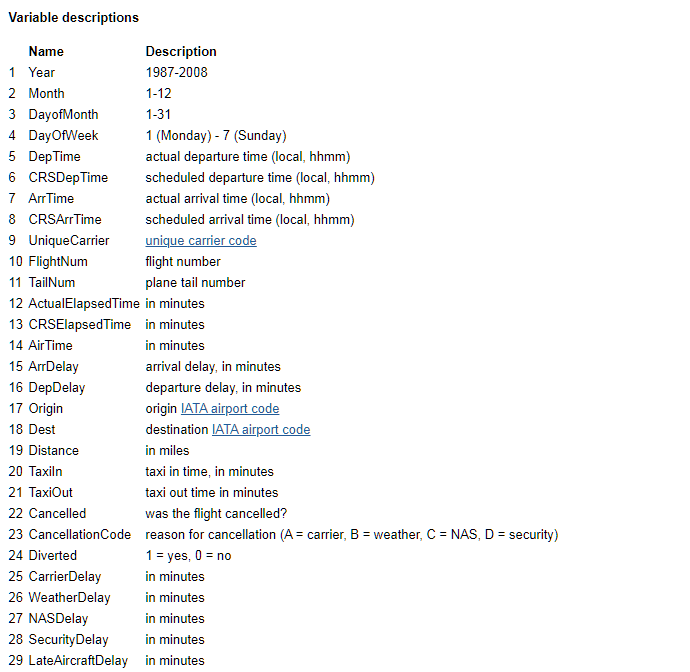

In [3]:
#esborrem les columnes que no considerem d'interès
df.drop(['FlightNum', 'TailNum', 'ArrTime', 'CRSArrTime', 'CRSElapsedTime', 'DepDelay', 
         'TaxiIn', 'TaxiOut', 'DepTime', 'CRSDepTime', 'CarrierDelay', 
         'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ], 
        axis = 'columns', inplace=True)

#canviem els noms de les cols que hem conservat
old_col_names = list(df.columns)
new_col_names = ["ANY", "MES", "DIA", "DIA_SET", "COD_AEROLINIA", "DURADA_TOTAL", 
                 "DURADA_AIRE", "RETARD", "COD_ORIGEN", "COD_DESTI", "DISTANCIA", 
                 "CANCELAT", "COD_CANCELACIO", "DESVIAT" ]

replace = dict(zip(old_col_names, new_col_names))
df.rename(columns=replace, inplace=True)
df.sample(3)

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,CANCELAT,COD_CANCELACIO,DESVIAT
2723640,2008,5,9,5,EV,78.0,38.0,33.0,CAE,ATL,191,0,N,0
3555508,2008,6,20,5,CO,173.0,151.0,138.0,DEN,CLE,1201,0,N,0
484236,2008,1,6,7,AA,259.0,240.0,44.0,ORD,SEA,1721,0,N,0


In [4]:
#convertirem int64 i float64 a int32 i float32 per reduir el dataframe
#definim una funcio que genera el diccionari de conversió de tipus
def dic_convert(colsint, colsfloat):
    dtype_l = []
    for i in range(0, len(colsint)): dtype_l.append("int32")
    for i in range(0, len(colsfloat)): dtype_l.append("float32")
    return dict(zip(colsint+colsfloat, dtype_l))

colsint = ["ANY", "MES", "DIA", "DIA_SET", "DISTANCIA", 
           "CANCELAT", "DESVIAT"]
colsfloat = ["DURADA_TOTAL", "DURADA_AIRE", "RETARD"]
dic = dic_convert(colsint, colsfloat)
df = df.astype(dic)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ANY             int32  
 1   MES             int32  
 2   DIA             int32  
 3   DIA_SET         int32  
 4   COD_AEROLINIA   object 
 5   DURADA_TOTAL    float32
 6   DURADA_AIRE     float32
 7   RETARD          float32
 8   COD_ORIGEN      object 
 9   COD_DESTI       object 
 10  DISTANCIA       int32  
 11  CANCELAT        int32  
 12  COD_CANCELACIO  object 
 13  DESVIAT         int32  
dtypes: float32(3), int32(7), object(4)
memory usage: 319.5 MB


## Exercici

Fes un informe complet del data set:.

### Resumeix estadísticament les columnes d’interès

In [5]:
df[["DURADA_TOTAL", "DURADA_AIRE", "DISTANCIA"]].describe()

,DURADA_TOTAL,DURADA_AIRE,DISTANCIA
count,1.928371e+06,1.928371e+06,1.936758e+06
mean,1.333069e+02,1.082788e+02,7.656862e+02
std,7.200964e+01,6.860229e+01,5.744797e+02
min,1.400000e+01,0.000000e+00,1.100000e+01
25%,8.000000e+01,5.800000e+01,3.380000e+02
50%,1.160000e+02,9.000000e+01,6.060000e+02
75%,1.650000e+02,1.370000e+02,9.980000e+02
max,1.114000e+03,1.091000e+03,4.962000e+03


In [6]:
#podem veure, en concret, el promig de duració en l'aire d'un vol
#definim funció per passar de minuts a str per mostrar dades temporals
def min_to_strtime(m):
    m_td = datetime.timedelta(minutes=m)
    hores, reste = divmod(m_td.seconds, 3600)
    minuts, segons = divmod(reste, 60)
    return ":".join([str(hores)+"h", str(minuts)+"m", str(segons)+"s"])

minuts = df["DURADA_AIRE"].mean()
min_to_strtime(minuts)

'1h:48m:16s'

In [7]:
#promig de distància per vol
#definim funció per passar de milles a km
def miles_to_km(m):
    km = m * 1.60934
    return round(km, 2)

dist = df["DISTANCIA"].mean()
str(miles_to_km(dist)) + "km"

'1232.25km'

In [8]:
#per exemple podem veure els vols per dia de la setmana
#abans podem mapejar la columna DIA_SET per ferla més llegible
dies_dict = {1:"diumenge", 2:"dilluns", 3:"dimarts", 4:"dimecres", 5:"dijous", 6:"divendres", 7:"dissabte"}
df["DIA_SET"] = df["DIA_SET"].map(dies_dict)

vols_dia = df.DIA_SET.value_counts()
vols_dia

dijous       323259
diumenge     290933
dimecres     289451
dissabte     286111
dimarts      262805
dilluns      260943
divendres    223256
Name: DIA_SET, dtype: int64

In [9]:
#en percentatges els vols per dia de la setmana:
totals = len(df.DIA_SET)
vols_dia.apply(lambda x : str(round((x*100/totals), 2)) + "%")

dijous       16.69%
diumenge     15.02%
dimecres     14.95%
dissabte     14.77%
dimarts      13.57%
dilluns      13.47%
divendres    11.53%
Name: DIA_SET, dtype: object

In [10]:
#analitzarem els vols cancel·lats i desviats
#convertim CANCELAT i DESVIAT a boolean per visualitzar
df = df.astype({"CANCELAT": bool, "DESVIAT": bool})

#definim funcio per retornar porcentatges de Series de tipus boolean
def perc_trues(series):
    try: trues = series.value_counts()[True]
    except: trues = 0
    totals = len(series)
    return str(round((trues * 100 / totals), 2)) + "%"

In [11]:
#observem el nombre de vols cancel·lats
df.CANCELAT.value_counts()

False    1936125
True         633
Name: CANCELAT, dtype: int64

In [12]:
#percentatge de vols totals cancel·lats
perc_trues(df["CANCELAT"])

'0.03%'

In [13]:
#calcularem dels cancel·lats els percentatges dels motius
df["COD_CANCELACIO"].value_counts()

N    1936125
B        307
A        246
C         80
Name: COD_CANCELACIO, dtype: int64

In [14]:
#calculem percentatges
#mapejem els motius per fer-los entendibles:
motiu_cancel = {"A": "Aerolínia", "B": "Temps", "C": "Tècnic", "D": "Seguretat", "N": "No cancelat"}
df["COD_CANCELACIO"] = df["COD_CANCELACIO"].map(motiu_cancel)

#generem un nou dataframe de cancel·lats:
cancel_df = df[df["CANCELAT"]]

motius_s = cancel_df["COD_CANCELACIO"].value_counts()
num_cancels = cancel_df["COD_CANCELACIO"].size
round(100 * motius_s / num_cancels, 2).astype(str) + "%"

Temps         48.5%
Aerolínia    38.86%
Tècnic       12.64%
Name: COD_CANCELACIO, dtype: object

In [15]:
#vols desviats
df["DESVIAT"].value_counts()

False    1929004
True        7754
Name: DESVIAT, dtype: int64

In [16]:
#percentatge vols desviats
perc_trues(df["DESVIAT"])

'0.4%'

In [17]:
#podem veure nombre de vols programats per aerolínia (s'inclouen els cancel·lats)
df.COD_AEROLINIA.value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: COD_AEROLINIA, dtype: int64

In [18]:
#per exemple podriem visualitzar, per aerolínia, els km totals i km promig de distàncies
vols_x_co = df.groupby('COD_AEROLINIA')

#utilitzem la funció generada anteriorment per visualitzar
vols_x_co["DISTANCIA"].agg([np.sum, np.mean]).applymap(miles_to_km)

,sum,mean
COD_AEROLINIA,,
9E,3.878161e+07,747.45
AA,3.340938e+08,1741.30
AQ,1.074078e+06,1432.10
AS,5.973907e+07,1520.35
B6,9.862930e+07,1783.05
CO,1.999466e+08,1995.57
DL,1.780624e+08,1558.70
EV,6.081013e+07,742.70
F9,4.081024e+07,1443.64


In [19]:
#o el nombre i percentatge de cancel·lats per aerolínia
def percentatge(series):
    return str(round(series.sum() * 100 / series.count(), 2)) + "%"

vols_x_co["CANCELAT"].agg([np.sum, np.size, percentatge])

,sum,size,percentatge
COD_AEROLINIA,,,
9E,58,51885,0.11%
AA,46,191865,0.02%
AQ,0,750,0.0%
AS,11,39293,0.03%
B6,10,55315,0.02%
CO,38,100195,0.04%
DL,21,114238,0.02%
EV,29,81877,0.04%
F9,2,28269,0.01%


### Troba quantes dades faltants hi ha per columna

In [20]:
#busquem valors nulls
df.isnull().sum()

ANY                  0
MES                  0
DIA                  0
DIA_SET              0
COD_AEROLINIA        0
DURADA_TOTAL      8387
DURADA_AIRE       8387
RETARD            8387
COD_ORIGEN           0
COD_DESTI            0
DISTANCIA            0
CANCELAT             0
COD_CANCELACIO       0
DESVIAT              0
dtype: int64

In [21]:
#eliminem els vols cancelats doncs ja no els necessitarem per evaluar les estadistiques dels vols realitzats
df.drop(df[df["CANCELAT"]].index, axis="index", inplace = True)

#eliminem la columna CANCELAT i la de codis doncs no nhi haurà cap
df.drop(['CANCELAT'], axis = 'columns', inplace=True)
df.drop(['COD_CANCELACIO'], axis = 'columns', inplace=True)

In [22]:
#mirem quants vols amb nulls ens queden
df.isnull().any(axis="columns").value_counts()

False    1928371
True        7754
dtype: int64

In [23]:
#Confirmem que hi ha el mateix nombre de desviats que de vols amb nulls
df[df["DESVIAT"] == True]["DESVIAT"].value_counts()

True    7754
Name: DESVIAT, dtype: int64

In [24]:
#Concluim que tots els nulls son desviats que no tenen dades del vol
df[df["DESVIAT"] == True].sample()

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,DESVIAT
3312297,2008,6,29,dissabte,DL,NaN,NaN,NaN,ROC,ATL,749,True


In [25]:
#eliminarem els desviats que no ens aporten info, i no ens haurien de quedar nulls al dataframe
df.drop(df[df["DESVIAT"]].index, axis="index", inplace = True)

#eliminem la columna doncs no nhi haurà cap
df.drop(['DESVIAT'], axis = 'columns', inplace=True)

In [26]:
#comprovem que no queden valors nulls
df.isnull().any(axis="columns").value_counts()

False    1928371
dtype: int64

### Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [27]:
# per crear la velocitat mitjana primer convertirem la distància de milles a km al df
#utilitzarem la funció miles_to_km(m), generada anteriorment

df["DISTANCIA"] = df["DISTANCIA"].apply(miles_to_km)
df["VEL_MITJA"] = df["DISTANCIA"] / (df["DURADA_AIRE"] / 60)

#generem la columna booleana si ha arribat tard
df["RETARDAT"] = df["RETARD"].apply(lambda x: True if x>10 else False)

df.sample(3)

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,VEL_MITJA,RETARDAT
592634,2008,1,4,dijous,DL,110.0,90.0,14.0,ATL,PHL,1070.21,713.473333,True
473175,2008,1,7,diumenge,9E,76.0,47.0,5.0,DTW,ROC,476.36,608.119127,False
4657271,2008,8,24,dissabte,MQ,112.0,93.0,27.0,RDU,BOS,984.92,635.432278,True


### Taula de les aerolínies amb més endarreriments acumulats

Crearem una nova columna amb el nom de l'aerolínia que mapejarem de la base de dades carriers.csv que ens donen a [Supplemental data](http://stat-computing.org/dataexpo/2009/supplemental-data.html)

In [28]:
#importem l'arxiu d'aerolínies com una series, amb els codis d'index
file = (datasets_path + "DelayedFlights-carriers.csv").replace(r"\\", r"\\\\")
co_s = pd.read_csv(file, sep=',', encoding='utf8', index_col=0, squeeze=True)
co_s.sample(3)

Code
OP                Flying Boat Inc.
FI                      Icelandair
SAC    Sundorph Aeronautical Corp.
Name: Description, dtype: object

In [29]:
#creem la nova columna mapejant la series
df["AEROLINIA"] = df["COD_AEROLINIA"].map(co_s)
df.sample()

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,VEL_MITJA,RETARDAT,AEROLINIA
1901455,2008,4,12,divendres,XE,124.0,96.0,71.0,EWR,GRR,973.65,608.531241,True,Expressjet Airlines Inc.


In [30]:
#agrupem per aerolínia
vols_x_co = df.groupby('AEROLINIA')

#obtenim el sumatori dels Trues o el nombre de vols retardats
#(recordem que haviem considerat que era retard si arribava a partir dels 10 min. de l'hora programada)
#(en un futur podríem reconsiderar aquest valor)
vols_x_co["RETARDAT"].sum()

AEROLINIA
AirTran Airways Corporation                                                             52463
Alaska Airlines Inc.                                                                    27037
Aloha Airlines Inc.                                                                       443
American Airlines Inc.                                                                 144326
American Eagle Airlines Inc.                                                           107440
Atlantic Southeast Airlines                                                             62458
Comair Inc.                                                                             42453
Continental Air Lines Inc.                                                              65637
Delta Air Lines Inc.                                                                    80964
Expressjet Airlines Inc.                                                                78577
Frontier Airlines Inc.                            

In [31]:
#fem una agregacio per obtindre nombre de retardats, el total de vols per aerolínia i 
#en percentatges els vols retardats per aerolínia
#(utilitzem la funcio percentatge definida anteriorment)

vols_x_co["RETARDAT"].agg([np.sum, np.size, percentatge])

,sum,size,percentatge
AEROLINIA,,,
AirTran Airways Corporation,52463,70969,73.92%
Alaska Airlines Inc.,27037,39010,69.31%
Aloha Airlines Inc.,443,744,59.54%
American Airlines Inc.,144326,190910,75.6%
American Eagle Airlines Inc.,107440,141223,76.08%
Atlantic Southeast Airlines,62458,81762,76.39%
Comair Inc.,42453,52453,80.94%
Continental Air Lines Inc.,65637,99731,65.81%
Delta Air Lines Inc.,80964,113728,71.19%


### Quins són els vols més llargs? I els més endarrerits?

In [32]:
#obtindrem, p.ex., els n=5 vols més llargs en quant a durada
#si es repeteixen les durades els mostrem tots
n = 5
df.nlargest(n, "DURADA_TOTAL", keep='all')

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,VEL_MITJA,RETARDAT,AEROLINIA
5180146,2008,9,9,dilluns,HA,1114.0,1091.0,1050.0,SEA,HNL,4308.20,236.931267,True,Hawaiian Airlines Inc.
6980183,2008,12,19,dijous,CO,790.0,634.0,162.0,EWR,HNL,7985.55,755.730288,True,Continental Air Lines Inc.
3922427,2008,7,23,dimarts,DL,776.0,346.0,410.0,JFK,SFO,4161.75,721.690724,True,Delta Air Lines Inc.
4614554,2008,8,19,dilluns,HA,750.0,733.0,612.0,HNL,SEA,4308.20,352.649399,True,Hawaiian Airlines Inc.
4811552,2008,8,2,divendres,CO,750.0,597.0,388.0,EWR,HNL,7985.55,802.567855,True,Continental Air Lines Inc.


In [33]:
#ara obtindrem els n=5 vols més llargs en quant a distància (buscarem distancia, i origen i destinació)
#generarem dues noves columnes per visualitzar el nom dels aeroports que mapejarem d'un arxiu de "Suplemental data"
#importem l'arxiu dels aeroports
file = (datasets_path + "DelayedFlights-airports.csv").replace(r"\\", r"\\\\")
ap_df = pd.read_csv(file, sep=',', encoding='utf8', index_col=0)
ap_df.sample(2)

,airport,city,state,country,lat,long
iata,,,,,,
F56,Arledge,Stamford,TX,USA,32.910195,-99.734230
PNP,Pilot Point,Pilot Point,AK,USA,57.580381,-157.567444


In [34]:
#generem nous camps mapejant els codis d'origen i destinació amb la series d'aeroports
df["AER_ORIGEN"] = df["COD_ORIGEN"].map(ap_df["airport"])
df["AER_DESTI"] = df["COD_DESTI"].map(ap_df["airport"])

#podem generar tb del mateix mode les ciutats d'origen i destinació
df["CITY_ORIGEN"] = df["COD_ORIGEN"].map(ap_df["city"])
df["CITY_DESTI"] = df["COD_DESTI"].map(ap_df["city"])

#com les distàncies son fixes entre aeroports, agrupem per distàncies uniques i seleccionem les n=5 mes grans
mes_distants = list(np.sort(df["DISTANCIA"].unique())[-(n+1):-1])
mes_distants

[6392.3, 6733.48, 6780.15, 6828.43, 7245.25]

In [35]:
#busquem el primer vol que trobem de cada una de les distàncies
series_list = []
for distance in mes_distants:
    series_list.append(df[df["DISTANCIA"] == distance].iloc[0])

#creem un nou dataframe i visualitzem els vols amb les n=5 distàncies més llargues
mes_distants_df = pd.DataFrame(series_list)
mes_distants_df[['DISTANCIA', 'AER_ORIGEN', 'CITY_ORIGEN', 'AER_DESTI', 'CITY_DESTI']]

,DISTANCIA,AER_ORIGEN,CITY_ORIGEN,AER_DESTI,CITY_DESTI
438603,6392.30,Honolulu International,Honolulu,Minneapolis-St Paul Intl,Minneapolis
218291,6733.48,Chicago O'Hare International,Chicago,Kahului,Kahului
218265,6780.15,Kona International At Keahole,Kailua/Kona,Chicago O'Hare International,Chicago
218178,6828.43,Chicago O'Hare International,Chicago,Honolulu International,Honolulu
305099,7245.25,Honolulu International,Honolulu,William B Hartsfield-Atlanta Intl,Atlanta


In [36]:
#busquem els n=5 vols més enraderits
df.nlargest(n, "RETARD", keep='all')

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURADA_AIRE,RETARD,COD_ORIGEN,COD_DESTI,DISTANCIA,VEL_MITJA,RETARDAT,AEROLINIA,AER_ORIGEN,AER_DESTI,CITY_ORIGEN,CITY_DESTI
1018798,2008,2,3,dissabte,NW,459.0,437.0,2461.0,HNL,MSP,6392.30,877.661331,True,Northwest Airlines Inc.,Honolulu International,Minneapolis-St Paul Intl,Honolulu,Minneapolis
2235378,2008,4,10,dimecres,NW,154.0,132.0,2453.0,CLT,MSP,1496.69,680.313622,True,Northwest Airlines Inc.,Charlotte/Douglas International,Minneapolis-St Paul Intl,Charlotte,Minneapolis
2832617,2008,5,6,dilluns,NW,172.0,145.0,1951.0,RSW,DTW,1746.13,722.536528,True,Northwest Airlines Inc.,Southwest Florida International,Detroit Metropolitan-Wayne County,Ft. Myers,Detroit
3387883,2008,6,20,dijous,MQ,72.0,50.0,1707.0,LIT,DFW,489.24,587.088014,True,American Eagle Airlines Inc.,Adams,Dallas-Fort Worth International,Little Rock,Dallas-Fort Worth
6857047,2008,12,19,dijous,NW,259.0,192.0,1655.0,BOS,MSP,1808.90,565.281242,True,Northwest Airlines Inc.,Gen Edw L Logan Intl,Minneapolis-St Paul Intl,Boston,Minneapolis


## Exercici
Exporta el data set net i amb les noves columnes a Excel

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ANY            int32  
 1   MES            int32  
 2   DIA            int32  
 3   DIA_SET        object 
 4   COD_AEROLINIA  object 
 5   DURADA_TOTAL   float32
 6   DURADA_AIRE    float32
 7   RETARD         float32
 8   COD_ORIGEN     object 
 9   COD_DESTI      object 
 10  DISTANCIA      float64
 11  VEL_MITJA      float64
 12  RETARDAT       bool   
 13  AEROLINIA      object 
 14  AER_ORIGEN     object 
 15  AER_DESTI      object 
 16  CITY_ORIGEN    object 
 17  CITY_DESTI     object 
dtypes: bool(1), float32(3), float64(2), int32(3), object(9)
memory usage: 204.8+ MB


In [1]:
#abans de desar convertirem alguns float32 a int32 en camps on els decimals no aporten cap info
#tb hi passarem la columna boolean que l'excel no la llegeix bé 
cols = ["DURADA_TOTAL", "DURADA_AIRE", "RETARD", "RETARDAT"]
dtype = []
for i in range(0, len(cols)): dtype.append("int32")
dic = dict(zip(cols, dtype))
df = df.astype(dic)

NameError: name 'df' is not defined

In [ ]:
#desem com excel
df.to_excel("DelayedFlights.xls", index=False, float_format="%.2f")